Import libraries

In [0]:
import numpy as np
import os
import tensorflow as tf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Noise = 0.1

Import Noisy Images

In [0]:
bad_frames = '/content/drive/My Drive/natural-images/natural_images/noisy_flower/0.1'

In [3]:
noisy_frames = []
for file in tqdm(sorted(os.listdir(bad_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames + '/' + file, target_size=(224,224))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32')/255
    noisy_frames.append(image)

noisy_frames = np.array(noisy_frames)

In [4]:
print(noisy_frames.shape)

(843, 420, 540, 3)


Import Clean Images

In [0]:
good_frames = '/content/drive/My Drive/natural-images/natural_images/flower'

In [6]:
clean_frames = []
for file in tqdm(sorted(os.listdir(good_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(good_frames + '/' + file, target_size=(224,224))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32')/255
    clean_frames.append(image)

clean_frames = np.array(clean_frames)

In [7]:
print(clean_frames.shape)

(843, 420, 540, 3)


Split Images Into Training & Test

In [8]:
round(len(noisy_frames)*0.8)

674

In [0]:
#80% of images to training set
noisy_train = noisy_frames[0:round(len(noisy_frames)*0.8)]
noisy_test = noisy_frames[round(len(noisy_frames)*0.8):]

clean_train = clean_frames[0:round(len(clean_frames)*0.8)]
clean_test = clean_frames[round(len(clean_frames)*0.8):]

Autoencoder

In [0]:
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (224, 224, 3)))
autoencoder.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(tf.keras.layers.UpSampling2D(size = (2,2)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(tf.keras.layers.UpSampling2D(size = (2,2)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(tf.keras.layers.UpSampling2D(size = (2,2)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 3, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'))

In [64]:
autoencoder.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 112, 112, 16)      4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 56, 56, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 28, 28, 8)        

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [62]:
history = autoencoder.fit(noisy_train, clean_train, epochs=15, validation_data=(noisy_test, clean_test))

Epoch 1/15


ValueError: ignored

Model History

In [0]:
plt.figure(figsize=(12,8))

Test Autoencoder

In [0]:
results = autoencoder.predict(noisy_test)

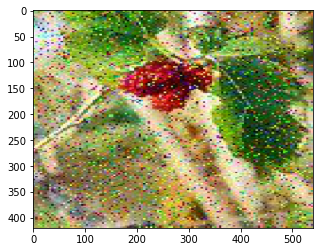

In [55]:
plt.imshow(noisy_test[0])
plt.show()

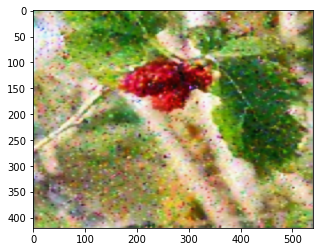

In [56]:
plt.imshow(results[0])
plt.show()

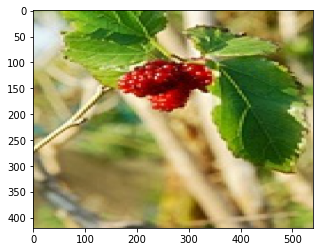

In [57]:
plt.imshow(clean_test[0])
plt.show()